## Clustering 

### Learning Objectives

- Understand the role of clustering and its applications. 
- Learn key clustering techniques. 
- Understand distance measures such as Euclidean, cosine distances. 
- Learn how to build clusters using *sklearn* library.

## Overview

- Clustering algorithms are unsupervised learning algorithms whereas regression and classifications are supervised learning algorithms. So, we have no knowledge of the outcome variables.
- Clustering is used to create heterogeneous subsets (clusters) from the original data such that each subset is homogeneous within the cluster and the identify the characteristics that differentiate the subsets.
- For examples, clustering is used to create homogeneous group of customers/entities for better management of customers.

### How clustering works?

- For examples, understand the key customer segments based on their characteristics like age and income (which are known).

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
import pandas as pd
customers_df = pd.read_csv( "customers.csv" )

Let's see the first few records from the dataset.

In [22]:
customers_df.head( 5 )

,income,age
0,41100.0,48.75
1,54100.0,28.10
2,47800.0,46.75
3,19100.0,40.25
4,18200.0,35.80


To visualize the relationship between age and income of customers, we will draw a scatter plot.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn


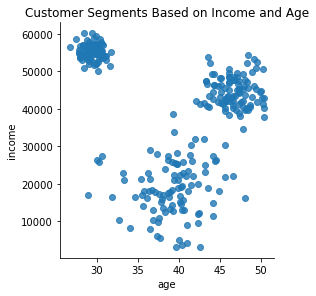

In [62]:
sn.lmplot( "age", "income", data=customers_df, fit_reg = False, size = 4 );
plt.title( "Customer Segments Based on Income and Age");

Plot shows that there might exist three customer segments, which can be described as below.

- One on top-left of the graph, depicting low age - high income group.
- One on the right of the graph, depicting high age - medium income group
- One of the bottom of the graph, depicting low-income group, which has age spread from low to high.

### Finding similarities using distances

- Clustering techniques assume that there are subsets in the data that are similar.
- One approach for measuring similarity is through distances measured using different metrics.

#### Euclidean Distance

For example the distance between two customers, $customer_{1}$ and $customer_{2}$ is calcualte as follows:

$\sqrt{(age_{1} - age_{2})^2 +  (income_{1} - income_{2})^2}$

To generalize if there are many attributes, then the distance across all attributes are calcualted to find out the distance. So, the euclidean distance between two observations $X_{1}$ and $X_{2}$ can be depicted as follows, if there are ${n}$ attributes and $x_{i}$ is ${i^{th}}$ attribute of each observation,

D(X1, X2) = $\sqrt\sum_{i=1}^{n} {(x_{i1} - x_{i2})^2}$


### K-means Clustering

K-means clustering is one of the frequently used clustering algorithms. It is a clustering method in which the number of clusters (K) is decided a priori.

The observations in the sample are assigned to one of the clusters (say $C_{1}, C_{2}, …, C_{K}$) based on the distance between the observations.

Now, let's create 3 clusters, as we know there are 3 segments existing from the above plot.

*sklearn* library has *KMeans* algorithm.

In [63]:
from sklearn.cluster import KMeans

clusters = KMeans( 3 )
clusters.fit( customers_df )

KMeans(n_clusters=3)

In [64]:
customers_df["clusterid"] = clusters.labels_

- Print first 5 customers with their cluster centers

In [65]:
customers_df[0:10]

,income,age,clusterid,clusterid_new
0,41100.0,48.75,0,1
1,54100.0,28.10,2,0
2,47800.0,46.75,0,1
3,19100.0,40.25,1,2
4,18200.0,35.80,1,2
5,19800.0,41.45,1,2
6,51500.0,31.55,2,0
7,39900.0,48.20,0,1
8,13000.0,36.80,1,2
9,31900.0,43.05,0,1


#### Plotting the customers with their segments

We will plot and depict each segment with different markings.

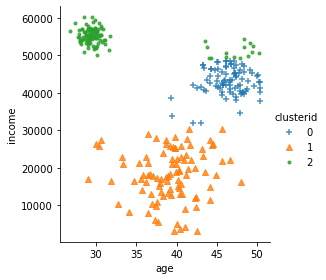

In [66]:
markers = ['+','^','.']

sn.lmplot( "age", "income", 
          data=customers_df, 
          hue = "clusterid", 
          fit_reg=False, 
          markers = markers,
          size = 4 );

The above clusters are mostly segmented based on income. This is because, salary is on a larger scale compared to age. The scale of age is 0 to 60, while salary ranges from 0 to 50000. So, the distance will always be determined by the difference salary and not age. 

So, before creating clusters all features need to be normalized. Standardization is a normalization tenchnique and is supported by *StandardScaler*. It normalize all values using substracting mean and dividing by standard deviation.

$X_{normalized}$ = $\frac{X - \bar{X}}{\sigma_{x}}$

Where $\bar{X}$ is mean of X and $\sigma_{x}$ is standard deviation of X.

### Normalizing the features

*StandardScaler* is available under *sklearn.preprocessing* module. Import and intialize the *StandardScaler* and pass dataframe to *fit()* to tranform the column values.

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
scaled_customers_df = scaler.fit_transform( 
    customers_df[["age", "income"]] )

scaled_customers_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

We can create the clusters again using normalized data.

In [69]:
from sklearn.cluster import KMeans

clusters_new = KMeans( 3, random_state=42 )
clusters_new.fit( scaled_customers_df )
customers_df["clusterid_new"] = clusters_new.labels_

The new segments created can be plotted using the scatter plot and marking each segment differently.

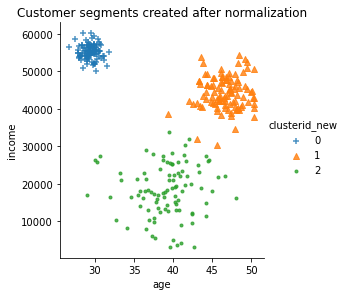

In [70]:
markers = ['+','^','.']

sn.lmplot( "age", "income", 
          data=customers_df, 
          hue = "clusterid_new", 
          fit_reg=False, 
          markers = markers,
          size = 4 );
plt.title( "Customer segments created after normalization");

Now the clusters seem to have been created properly. The cluster centers are given by *clusters.cluster_centers_*.

### Cluster Centers and Interpreting the Clusters

In [71]:
customers_df.groupby( 'clusterid' )['age', 
                            'income'].agg( ["mean"] ).reset_index()

,clusterid,age,income
,,mean,mean
0,0,46.419101,43053.932584
1,1,39.174479,18144.791667
2,2,31.700435,54675.652174


The clusters can be intrepreted as follows:

- $cluster_{0}$ - customers with mean age of 31 and income of 54. Low age and High income. 
- $cluster_{1}$ - customers with mean age of 39 and income of 18K. Low income.
- $cluster_{2}$ - customers with mean age of 46 and income of 43k. High age and medium income. 

## Creating Product Segments

- In this example, we will try to cluster data with 4 featues. This is a dataset of beer brands and their corresponding features like calories, sodium, alcohol and cost. 
- Let's say that you want to launch a new beer brand into the market and as part this exercise you are trying to undertand what kind of beers exist in the market and what customer segements it targets.

The dataset contains about 20 observations.

### 7.3.1 Beer Dataset

In [72]:
beer_df = pd.read_csv( 'beer.csv' )

In [73]:
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


As the features are in different scales, first these features need to be normalized. 

First step in creating clusters is to normalize the features in beer dataset.

In [74]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories', 
                                                'sodium', 
                                                'alcohol', 
                                                'cost']] )

### How many clusters exist?

Because there are 4 featues, it is not possible to plot and visualize them to understand how many cluster may exist. For high dimensional data, the following techniques can be used for discovering possible number of clusters.

- Dendrogram
- Elbow Method

#### Using Dendrogram

A dendogram is a cluster tree diagram, which groups the entities together that are nearer to each other. A dengogram can be drawn as follows:

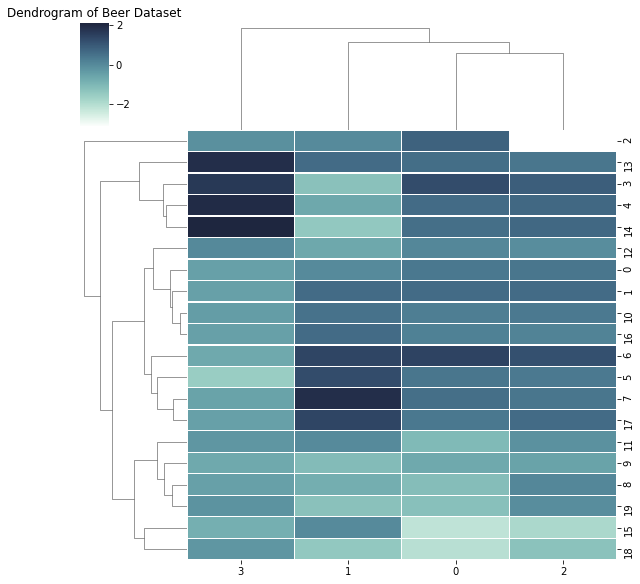

In [75]:
cmap = sn.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
sn.clustermap(scaled_beer_df, cmap=cmap, linewidths=.2, 
              figsize = (8,8) );
plt.title( "Dendrogram of Beer Dataset");

- Dendrogram reorders the observations based on how close they are to each using distances (euclidean). 

- For example, in the above diagram the distance between beer brand 10 and 16 are closest. They seem to be very similar to each other.

In [76]:
beer_df.loc[[10,16]]

,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


- *Lowenbrau* seems to have very low alcohol content. This may be an outlier or may be data error. It can be dropped from the dataset. 

- The tree structure on the left of the dendogram gives an indication that there may be 4 or 5 clusters in the dataset. 
- This is only a guideline or indication about number of clusters, but the actual number of clusteres can be determined only after creating the clusters and intrepret them. Creating more number of clusters may result into complexity of defining and managing them. - It is always advisable to have less and resonable number of clusters that make business sense. 
- We will create 3 clusters and verify if the clusters explain the product segments clearly and well. 

### 7.3.3 Finding Optimal Number of Clusters using Elbow Method

Elbow method considers the percentage of variance explained as a function of the number of clusters. And the number of cluster is chosen in such a way that adding another cluster doesn't give any better modeling of the data. 


Within Cluster Sum of Squared errors = ${\underset {\mathbf {S} }{\operatorname {arg\,min} }}\sum _{i=1}^{k}\sum _{\mathbf {x} \in S_{i}}\left\|\mathbf {x} -{\boldsymbol {\mu }}_{i}\right\|^{2}$

if the percentage of variance explained by the clusters is plotted against the number of clusters, the initial increase in number of clusters will add much information (explain a lot of variance), but at some point the *marginal gain in explained variance* will drop, giving an angle in the graph. The number of clusters is chosen at this point and called "elbow criterion".

Let's create number clusters ranging from 1 to 10 and observe the within-cluster sum of squares (WCSS) in each cluster and how marginal gain in explained variance start to diminish gradually. 

- *interia_* parameter in *KMeans* cluster algorithms provide the total variance for a particular number of clusters.

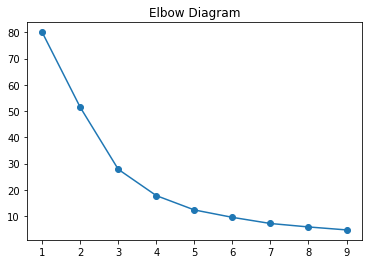

In [77]:
cluster_range = range( 1, 10 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( scaled_beer_df )
  cluster_errors.append( clusters.inertia_ )

plt.figure(figsize=(6,4))
plt.plot( cluster_range, cluster_errors, marker = "o" );
plt.title( "Elbow Diagram");

The above plot indicates the eblow point is at 3, which indicates there might be 3 clusters that may exist in the dataset. As mentioned earlier, these technique provides only a guideline of how many clusters may exist. Here we will discuss 3 clusters, but the readers can create 4 clusters and try to interpret them, if 4 clusters make sense.

#### Rescaling the dataset

In [78]:
beer_df.drop( index=[2], axis = 0, inplace = True)

In [79]:
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform( beer_df[['calories', 
                                                'sodium', 
                                                'alcohol', 
                                                'cost']] )

#### Creating 3 Clusters

We will set k to 3 for running *KMeans* algorithm and create a new column *clusterid* in *beer_df* to capture the cluster number it is assigned to.

In [80]:
k = 3

clusters = KMeans( k, random_state = 42 )
clusters.fit( scaled_beer_df )
beer_df["clusterid"] = clusters.labels_

### 7.3.4 Interpreting the Clusters

#### Cluster 0

In [81]:
beer_df[beer_df.clusterid == 0]

,name,calories,sodium,alcohol,cost,clusterid
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
11,Coors_Light,102,15,4.1,0.46,0
12,Michelob_Light,135,11,4.2,0.50,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
19,Schlitz_Light,97,7,4.2,0.47,0


All beers with medium alcohol content and medium cost are grouped together. This is the largest segement and may be targetting largest segment of customers.

#### Cluster 1

In [82]:
beer_df[beer_df.clusterid == 1]

,name,calories,sodium,alcohol,cost,clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
16,Hamms,139,19,4.4,0.43,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1


All the lights beer with low calories and sodium content are clustered into one group.

#### Cluster 2

In [83]:
beer_df[beer_df.clusterid == 2]

,name,calories,sodium,alcohol,cost,clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2


These are expensive beers with relatively high alcohol content. Also, sodium content is low. The costs are high because the target customers could be brand sensitive.

## Lessons Learnt

1. Clustering is an unsupervised learning algorithms that divides the data set into homogeneous subsets (in non-overlapping clusters) that are homogeneous within the group and heterogeneous between the groups. 
2. Several distance measures such as Euclidian distance, Cosine are used in clustering algorithms.
3. K-means clustering is a popular techniques used for clustering. 
4. The number of clusters can be decided using either dendrogram or elbow curve.